In [2]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist 
from keras.layers.core import Activation,Dense,Dropout
from keras.optimizers import SGD
from keras.utils import np_utils 
from matplotlib import pyplot as plt
model=Sequential()



Using TensorFlow backend.


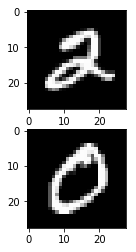

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
______________________

In [3]:
np.random.seed(1617)

#network and training

epoch=10
size=100
classes=10  #number of outputs
Verbose=1

Optimizer=SGD()
N_Hidden=128
Validiation_split=.2
DropOut=.3

(x_train,y_train),(x_test,y_test)=mnist.load_data()

plt.subplot(221)
plt.imshow(x_train[5],cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[1],cmap=plt.get_cmap('gray'))
plt.show()


Reshaped=784

x_train=x_train.reshape(60000,Reshaped)
x_test=x_test.reshape(10000,Reshaped)
print(x_train)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')


#normilize
x_train/=255
x_test/=255





#print(x_train.shape[0],"train test")

#print(x_test.shape[0],"train test")


#covert the class vector to binary class matrix

y_train=np_utils.to_categorical(y_train,classes)
y_test=np_utils.to_categorical(y_test,classes)
#print(y_train)

#defining nueral network



model=Sequential()
model.add(Dense(N_Hidden,input_shape=(Reshaped,)))
model.add(Activation('relu'))
model.add(Dense(N_Hidden))
model.add(Activation('relu'))
model.add(Dropout(DropOut))

model.add(Dense(classes,input_shape=(Reshaped,)))
model.add(Activation('softmax'))# it create a k dimensional vector
model.summary()

model.compile(optimizer='sgd',loss="categorical_crossentropy",metrics=['accuracy'])



history=model.fit(x_train,y_train,batch_size=size,verbose=Verbose,epochs=epoch,validation_split=Validiation_split)
score=model.evaluate(x_train,y_train,batch_size=size,verbose=Verbose)

print("Test score",score[0])
print("Test Accuracy",score[1])


       